In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# 1.1 Creating the dataset
For this simple task, we'll be creating our own example data set.

As motivation for this data, let’s suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

Ultimately, we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data.

In [2]:
train_labels=[]
train_samples=[]

In [3]:
for i in range(50):
    random_younger=np.random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older=np.random.randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger=np.random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older=np.random.randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    

# 1.2 Converting the data to numpy array

In [5]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_samples,train_labels=shuffle(train_samples,train_labels)

In [6]:
train_samples

array([34, 22, 72, ..., 17, 13, 80])

# 1.3 Scaling the data

In [7]:

scaler=MinMaxScaler(feature_range=(0,2))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

In [9]:
import tensorflow as tf 

C:\Users\User\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# 2.1 Creating the model architecture

In [29]:
model=Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
    
])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# 2.2 Compiling the model and run it

In [31]:
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(scaled_train_samples,train_labels,batch_size=10,validation_split=0.1,epochs=20,verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
1890/1890 - 0s - loss: 0.0525 - accuracy: 0.9915 - val_loss: 0.0515 - val_accuracy: 0.9857
Epoch 2/20
1890/1890 - 0s - loss: 0.0514 - accuracy: 0.9921 - val_loss: 0.0504 - val_accuracy: 0.9857
Epoch 3/20
1890/1890 - 0s - loss: 0.0503 - accuracy: 0.9926 - val_loss: 0.0493 - val_accuracy: 0.9857
Epoch 4/20
1890/1890 - 0s - loss: 0.0492 - accuracy: 0.9915 - val_loss: 0.0488 - val_accuracy: 1.0000
Epoch 5/20
1890/1890 - 0s - loss: 0.0484 - accuracy: 0.9921 - val_loss: 0.0476 - val_accuracy: 0.9857
Epoch 6/20
1890/1890 - 0s - loss: 0.0473 - accuracy: 0.9926 - val_loss: 0.0470 - val_accuracy: 1.0000
Epoch 7/20
1890/1890 - 0s - loss: 0.0463 - accuracy: 0.9958 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 8/20
1890/1890 - 0s - loss: 0.0458 - accuracy: 0.9963 - val_loss: 0.0450 - val_accuracy: 0.9857
Epoch 9/20
1890/1890 - 0s - loss: 0.0449 - accuracy: 0.9931 - val_loss: 0.0450 - val_accuracy: 1.0000
Epoch 10/20
1890/1890 - 0s - loss: 

# 3.1 validation on test data made by us

In [38]:
def scale(X):
    #X is a list of input
    scaler=MinMaxScaler(feature_range=(0,2))
    scaled_test_samples=scaler.fit_transform(X.reshape(-1,1))
    
    return scaled_test_samples
    
    

In [36]:
test_labels=[]
test_samples=[]

In [37]:
for i in range(10):
    random_younger=np.random.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older=np.random.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger=np.random.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older=np.random.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    

In [44]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
scaled_test_samples=scale(test_samples)

In [46]:
prediction=model.predict(scaled_test_samples,batch_size=10,verbose=0)

In [47]:
predict_class=model.predict_classes(scaled_test_samples,batch_size=10,verbose=0)

# 3.2 plotting confusion matrix

In [66]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_recall_fscore_support
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
cm=confusion_matrix(predict_class,test_labels)

In [63]:
cm

array([[210,   0],
       [  0, 210]], dtype=int64)

In [81]:
#this is just direcly coppied from a website, no need to worry
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[210   0]
 [  0 210]]


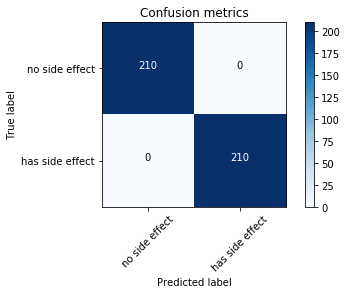

In [65]:
cm_labels=["no side effect","has side effect"]
plot_confusion_matrix(cm=cm,classes=cm_labels,title="Confusion metrics")

# 3.3 evaluating by precesion recall and fscore

In [67]:
precision_recall_fscore_support(test_labels,predict_class,average="weighted")

(1.0, 1.0, 1.0, None)

# 4 *save and load a model*

# saving as h5 
This method of saving will save everything about the model – the architecture, the weights, the optimizer, the state of the optimizer, the learning rate, the loss, etc.

In [68]:
 model.save("medical_model.h5")

In [69]:
from tensorflow.keras.models import load_model

In [70]:
new_model=load_model("medical_model.h5")

In [71]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# saving as json model
There is another way we save only the architecture of the model. This will not save the model weights, configurations, optimizer, loss or anything else. This only saves the architecture of the model.

In [72]:
json_string=model.to_json()


In [73]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)
model_architecture.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
